1. Impoting Dependencies :

C-Number of row & columns:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

2. Data Collcetion and Analysis:

A- Loading dataset :

In [2]:
data_gold = pd.read_csv("C:/Machine_learning Python/projets/GoldPrice/gld_price_data.csv")

B- View the data (head)

In [3]:
data_gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


C- View the last 5 row of the data:

In [4]:
data_gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


D- type of  the data (head)

In [5]:
type(data_gold)

pandas.core.frame.DataFrame

E-Number of row & columns:

In [6]:
data_gold.shape

(2290, 6)

F- Information about the data:

In [7]:
data_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


2. Statisctical measures :

A- General Statistic:

In [8]:
data_gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


B- Number of missing value in each column;

In [9]:
data_gold.isnull().sum()
#Any missing values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

3. Correlation:

A- Positive correlation:

In [10]:
data_goldCorr = data_gold.iloc[:,1:]
correlation = data_goldCorr.corr()

B- Contruction of the heatmap

<Axes: >

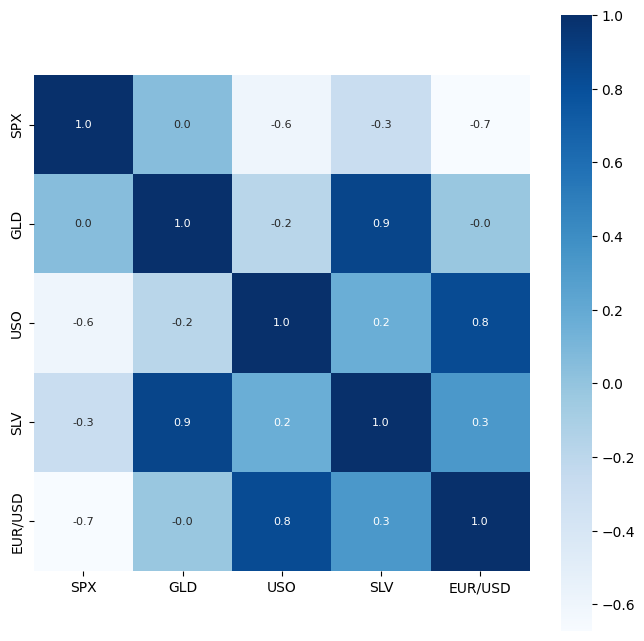

In [11]:
plt.figure(figsize= (8,8) )
sns.heatmap(correlation, cbar=True, square=True, fmt = ".1f", annot=True, annot_kws={'size':8}, cmap='Blues')

B- Correlation value of GLD:

In [12]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C- Cheking the distribution of the GOLDQ PRICE:

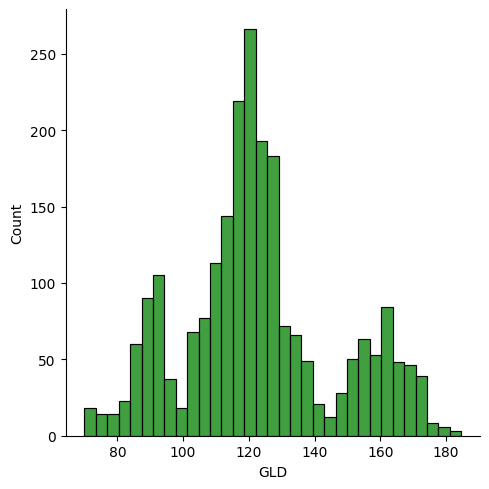

In [13]:
sns.displot(data_gold['GLD'], color='green')

5. Train test split:

A- Separating a data & label

In [14]:
X = data_gold.drop(['Date', 'GLD'], axis=1)
Y = data_gold["GLD"]
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


B- Test Split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [16]:
print(X.shape,X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


6. Training the model (Randon Forest Regression):

A- Loading the model

In [17]:
model = RandomForestRegressor()

B- Training the model:

In [18]:
model.fit(X_train, Y_train)

RandomForestRegressor()

7. Model Evaluation:

A- Prediction of test data:

In [19]:
test_train_prediction = model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_train_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9892352349582277


B- Compare the actual valuead and Predicted value:

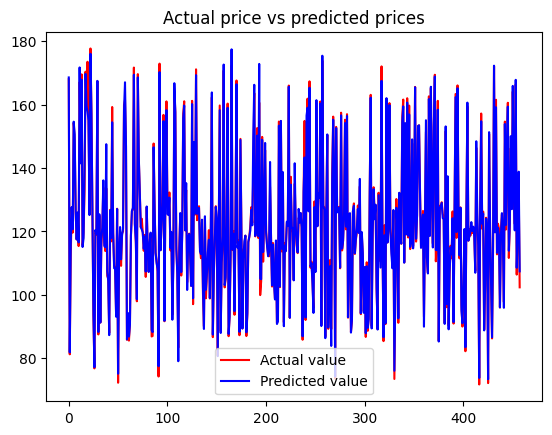

In [20]:
Y_test = list(Y_test)
plt.plot(Y_test, color = 'red', label ='Actual value')
plt.plot(test_train_prediction, color = 'blue', label ='Predicted value')
plt.title("Actual price vs predicted prices")
plt.legend()
plt.show()

8- Example:

In [22]:
def  predictionF(SPX,USO,SLV,EUR_USD):
    input_data = (SPX,USO,SLV,EUR_USD)
    #Input the data into the numpy array:
    input_dataNumpuy = np.asarray(input_data)
    #Reshape the data:
    input_dataReshaped = input_dataNumpuy.reshape(1,-1)
    #Predict the model:
    prediction = model.predict(input_dataReshaped)
    print("The predcition price of the gold is:", prediction[0])

predictionF(1400.160034,90.470001,13.18,1.471692)

The predcition price of the gold is: 82.40459928000004


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
